# Collecting Tweets Related to Stock Market

Group Name: Core Four
Submitted by:
    Neethu Ignacious,Sanjana Bale,Suryansh Bali,Pooja Patel

## Objective

1) Gain experience of collecting data from Twitter using Twitter API
2) Gain experience of data storage to store the data and query
3) Gain experience of collecting real-time data
4) Gain experience of data cleaning 

In [ ]:
#Keys to connect to the Twitter API

ACCESS_TOKEN="1333442840299335695-ZxTCkpIqtDNCllQ17kIMhcZQ69RatE"
ACCESS_TOKEN_SECRET="G170Px1srb4v2SrIQv2dNTID6XThhtT0Q4XHMRNSaT9gZ"
CONSUMER_API_KEY="oil1zX5GMJI19sjqPI78aPSfk"
CONSUMER_API_SECRET="mZL6aEy8xeVvcAZgggatlg76qqF0vCN85j4qzZgAoMKXLQgpmh"

In [2]:
#Importing libraries

import tweepy as tw
import pandas as pd
import numpy as np
import re

## Data Collection

In [ ]:
def create_dataframe(search_term):
       
    auth = tw.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
    api = tw.API(auth, wait_on_rate_limit = True)
    
    id = []
    tweets = []
    username = []
    createdtime = []
    result_type = 'recent'
    until_date = '2021-06-22'
    since_date = '2021-06-15'
    max_tweets = 100000
    
    for i in tw.Cursor(api.search,q = search_term,lang = 'en',result_type = result_type,since = since_date,
                       until = until_date, count = 100,tweet_mode = 'extended').items(max_tweets):
        id.append(i.id)
        createdtime.append(i.created_at)
        username.append(i.user.screen_name)
        tweets.append(i.full_text)

    df = pd.DataFrame({'id':id,'createdtime':createdtime,'username':username,'tweets':tweets})
    return df

## Saving the data

In [ ]:
df_altcoin = create_dataframe('#Altcoin')
df_altcoin.to_csv("Altcoin_rawdata.csv")

In [ ]:
df_bitcoin = create_dataframe('#Bitcoin')
df_bitcoin.to_csv("Bitcoin_rawdata.csv")

In [ ]:
df_coindesk = create_dataframe('#Coindesk')
df_coindesk.to_csv("Coindesk_rawdata.csv")

In [ ]:
df_cryptocurrency = create_dataframe('#Cryptocurrency')
df_cryptocurrency.to_csv("Cryptocurrency_rawdata_new.csv")

In [ ]:
df_gold = create_dataframe('#Gold')
df_gold.to_csv("Gold_rawdata.csv")

In [ ]:
df_appl = create_dataframe('#APPL')
df_appl.to_csv("APPL_rawdata.csv")

In [ ]:
df_goog = create_dataframe('#GOOG')
df_goog.to_csv("GOOG_rawdata.csv")

In [ ]:
df_yhoo = create_dataframe('#Yahoo')
df_yhoo.to_csv("YHOO_rawdata.csv")

## Data Cleaning

In [4]:
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i,'',input_text)
    return input_text

In [5]:
def CleanTwt(twt):
    twt = re.sub('#[A-Za-z0-9]+', '', twt)
    twt = re.sub(r'@[A-Za-z0-9]+', '', twt)
    twt = re.sub(r'\b\w{1,1}\b', '', twt)
    twt = re.sub('\\n', '', twt)
    twt = re.sub(r'[0-9]+', '', twt)
    twt = re.sub(r'RT', '', twt)
    twt = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", '', twt)
    twt = " ".join(twt.split())
    twt = twt.replace("#", "").replace("_", " ") 
    return twt


In [6]:
def clean(df):
    df['tweets'] = df['tweets'].apply(CleanTwt)
    df['tweets'] = np.vectorize(remove_pattern)(df['tweets'],"@[\w]*")
    df['tweets'] = df['tweets'].str.replace("[^a-zA-Z0-9#]",' ')
    df['tweets'] = df['tweets'].str.lower()
    df['tweets'] = df['tweets'].str.lstrip()
    df['tweets'] = df['tweets'].str.strip(" ")
    return df

In [7]:
import string
def remove_punct(text):
    df = ''.join([char for char in text if char not in string.punctuation])
    return df

In [8]:
def one_word(twt):
    twt = re.sub(r'\b\w{1,1}\b', '', twt)
    return twt

In [ ]:
df_altcoin=pd.read_csv("Altcoin_rawdata.csv")
cleaned_altcoin_df=clean(df_altcoin)
cleaned_altcoin_df['tweets'] = cleaned_altcoin_df['tweets'].apply(lambda x: remove_punct(x))
cleaned_altcoin_df['tweets'] = cleaned_altcoin_df['tweets'].apply(one_word)
cleaned_altcoin_df['tweets'] = cleaned_altcoin_df['tweets'].str.strip()
cleaned_altcoin_df.drop_duplicates(subset = "tweets",keep = "last", inplace = True,ignore_index=True)
cleaned_altcoin_df.to_csv("Altcoin.csv")

In [ ]:
df_bitcoin=pd.read_csv("Bitcoin_rawdata.csv")
cleaned_bitcoin_df=clean(df_bitcoin)
cleaned_bitcoin_df['tweets'] = cleaned_bitcoin_df['tweets'].apply(lambda x: remove_punct(x))
cleaned_bitcoin_df['tweets'] = cleaned_bitcoin_df['tweets'].apply(one_word)
cleaned_bitcoin_df['tweets'] = cleaned_bitcoin_df['tweets'].str.strip()
cleaned_bitcoin_df.drop_duplicates(subset = "tweets",keep = "last", inplace = True,ignore_index=True)
cleaned_bitcoin_df.to_csv("Bitcoin.csv")

In [ ]:
df_coindesk=pd.read_csv("Coindesk_rawdata.csv")
cleaned_coindesk_df=clean(df_coindesk)
cleaned_coindesk_df['tweets'] = cleaned_coindesk_df['tweets'].apply(lambda x: remove_punct(x))
cleaned_coindesk_df['tweets'] = cleaned_coindesk_df['tweets'].apply(one_word)
cleaned_coindesk_df['tweets'] = cleaned_coindesk_df['tweets'].str.strip()
cleaned_coindesk_df.drop_duplicates(subset = "tweets",keep = "last", inplace = True,ignore_index=True)
cleaned_coindesk_df.to_csv("Coindesk.csv")

In [ ]:
df_cryptocurrency=pd.read_csv("Cryptocurrency_rawdata.csv")
cleaned_cryptocurrency_df=clean(df_cryptocurrency)
cleaned_cryptocurrency_df['tweets'] = cleaned_cryptocurrency_df['tweets'].apply(lambda x: remove_punct(x))
cleaned_cryptocurrency_df['tweets'] = cleaned_cryptocurrency_df['tweets'].apply(one_word)
cleaned_cryptocurrency_df['tweets'] = cleaned_cryptocurrency_df['tweets'].str.strip()
cleaned_cryptocurrency_df.drop_duplicates(subset = "tweets",keep = "last", inplace = True,ignore_index=True)
cleaned_cryptocurrency_df.to_csv("Cryptocurrency.csv")

In [ ]:
df_gold=pd.read_csv("Gold_rawdata.csv")
cleaned_gold_df=clean(df_gold)
cleaned_gold_df['tweets'] = cleaned_gold_df['tweets'].apply(lambda x: remove_punct(x))
cleaned_gold_df['tweets'] = cleaned_gold_df['tweets'].apply(one_word)
cleaned_gold_df['tweets'] = cleaned_gold_df['tweets'].str.strip()
cleaned_gold_df.drop_duplicates(subset = "tweets",keep = "last", inplace = True,ignore_index=True)
cleaned_gold_df.to_csv("Gold.csv")

In [ ]:
df_appl=pd.read_csv("APPL_rawdata.csv")
cleaned_appl_df=clean(df_appl)
cleaned_appl_df['tweets'] = cleaned_appl_df['tweets'].apply(lambda x: remove_punct(x))
cleaned_appl_df['tweets'] = cleaned_appl_df['tweets'].apply(one_word)
cleaned_appl_df['tweets'] = cleaned_appl_df['tweets'].str.strip()
cleaned_appl_df.drop_duplicates(subset = "tweets",keep = "last", inplace = True,ignore_index=True)
cleaned_appl_df.to_csv("APPL.csv")

In [ ]:
df_goog=pd.read_csv("GOOG_rawdata.csv")
cleaned_goog_df=clean(df_goog)
cleaned_goog_df['tweets'] = cleaned_goog_df['tweets'].apply(lambda x: remove_punct(x))
cleaned_goog_df['tweets'] = cleaned_goog_df['tweets'].apply(one_word)
cleaned_goog_df['tweets'] = cleaned_goog_df['tweets'].str.strip()
cleaned_goog_df.drop_duplicates(subset = "tweets",keep = "last", inplace = True,ignore_index=True)
cleaned_goog_df.to_csv("GOOG.csv")

In [9]:
df_yhoo=pd.read_csv("YHOO_rawdata.csv")
cleaned_yhoo_df=clean(df_yhoo)
cleaned_yhoo_df['tweets'] = cleaned_yhoo_df['tweets'].apply(lambda x: remove_punct(x))
cleaned_yhoo_df['tweets'] = cleaned_yhoo_df['tweets'].apply(one_word)
cleaned_yhoo_df['tweets'] = cleaned_yhoo_df['tweets'].str.strip()
cleaned_yhoo_df.drop_duplicates(subset = "tweets",keep = "last", inplace = True,ignore_index=True)
cleaned_yhoo_df.to_csv("YHOO.csv")

## Reading the Cleaned Data

In [10]:
cleaned_altcoin_df=pd.read_csv("Altcoin.csv")
cleaned_bitcoin_df=pd.read_csv("Bitcoin.csv")
cleaned_coindesk_df=pd.read_csv("Coindesk.csv")
cleaned_cryptocurrency_df=pd.read_csv("Cryptocurrency.csv")
cleaned_gold_df=pd.read_csv("Gold.csv")
cleaned_appl_df=pd.read_csv("APPL.csv")
cleaned_goog_df=pd.read_csv("GOOG.csv")
cleaned_yhoo_df=pd.read_csv("YHOO.csv")

## Data Visualization

In [11]:
def tweet_count(df,keyword):
    
    df['createdtime'] = pd.to_datetime(df['createdtime']).dt.date
    cnt = df.groupby('createdtime').size().rename('Count')
    result = df.drop_duplicates(subset='createdtime').merge(cnt, left_on='createdtime',right_index=True)
    result = result[['createdtime','Count']]
    result = result.rename({'createdtime': 'Date', 'Count': keyword}, axis='columns')
    result = result.reset_index(drop=True)
    return result

In [12]:
altcoin_new = tweet_count(cleaned_altcoin_df, 'Altcoin')
bitcoin_new = tweet_count(cleaned_bitcoin_df, 'Bitcoin')
coindesk_new = tweet_count(cleaned_coindesk_df, 'Coindesk')
cryptocurrency_new = tweet_count(cleaned_cryptocurrency_df, 'Cryptocurrency')
gold_new = tweet_count(cleaned_gold_df, 'Gold')
appl_new = tweet_count(cleaned_appl_df, 'APPL')
goog_new = tweet_count(cleaned_goog_df, 'GOOG')
yhoo_new = tweet_count(cleaned_yhoo_df, 'YHOO')

In [13]:
tweet_count_df=altcoin_new
tweet_count_df['Bitcoin'] = bitcoin_new['Bitcoin'].values
tweet_count_df['Coindesk'] = coindesk_new['Coindesk'].values
tweet_count_df['Cryptocurrency'] = cryptocurrency_new['Cryptocurrency'].values
tweet_count_df['Gold'] = gold_new['Gold'].values
tweet_count_df['APPL'] = appl_new['APPL'].values
tweet_count_df['GOOG'] = goog_new['GOOG'].values
tweet_count_df['YHOO'] = yhoo_new['YHOO'].values

In [14]:
tweet_count_df

,Date,Altcoin,Bitcoin,Coindesk,Cryptocurrency,Gold,APPL,GOOG,YHOO
0,2021-06-21,1613,29629,52,10584,2335,2,6,16
1,2021-06-20,1654,17917,15,6895,1089,1,6,31
2,2021-06-19,1570,15808,69,7232,1312,1,8,25
3,2021-06-18,1841,20236,9,8871,2420,5,18,23
4,2021-06-17,2049,21823,25,9641,3631,1,15,36
5,2021-06-16,1806,20189,5,8464,2916,2,51,41
6,2021-06-15,1994,22256,27,6915,2708,4,106,41


In [15]:
tweet_count_df.to_csv("Data.csv")

### Count of Daily Tweets

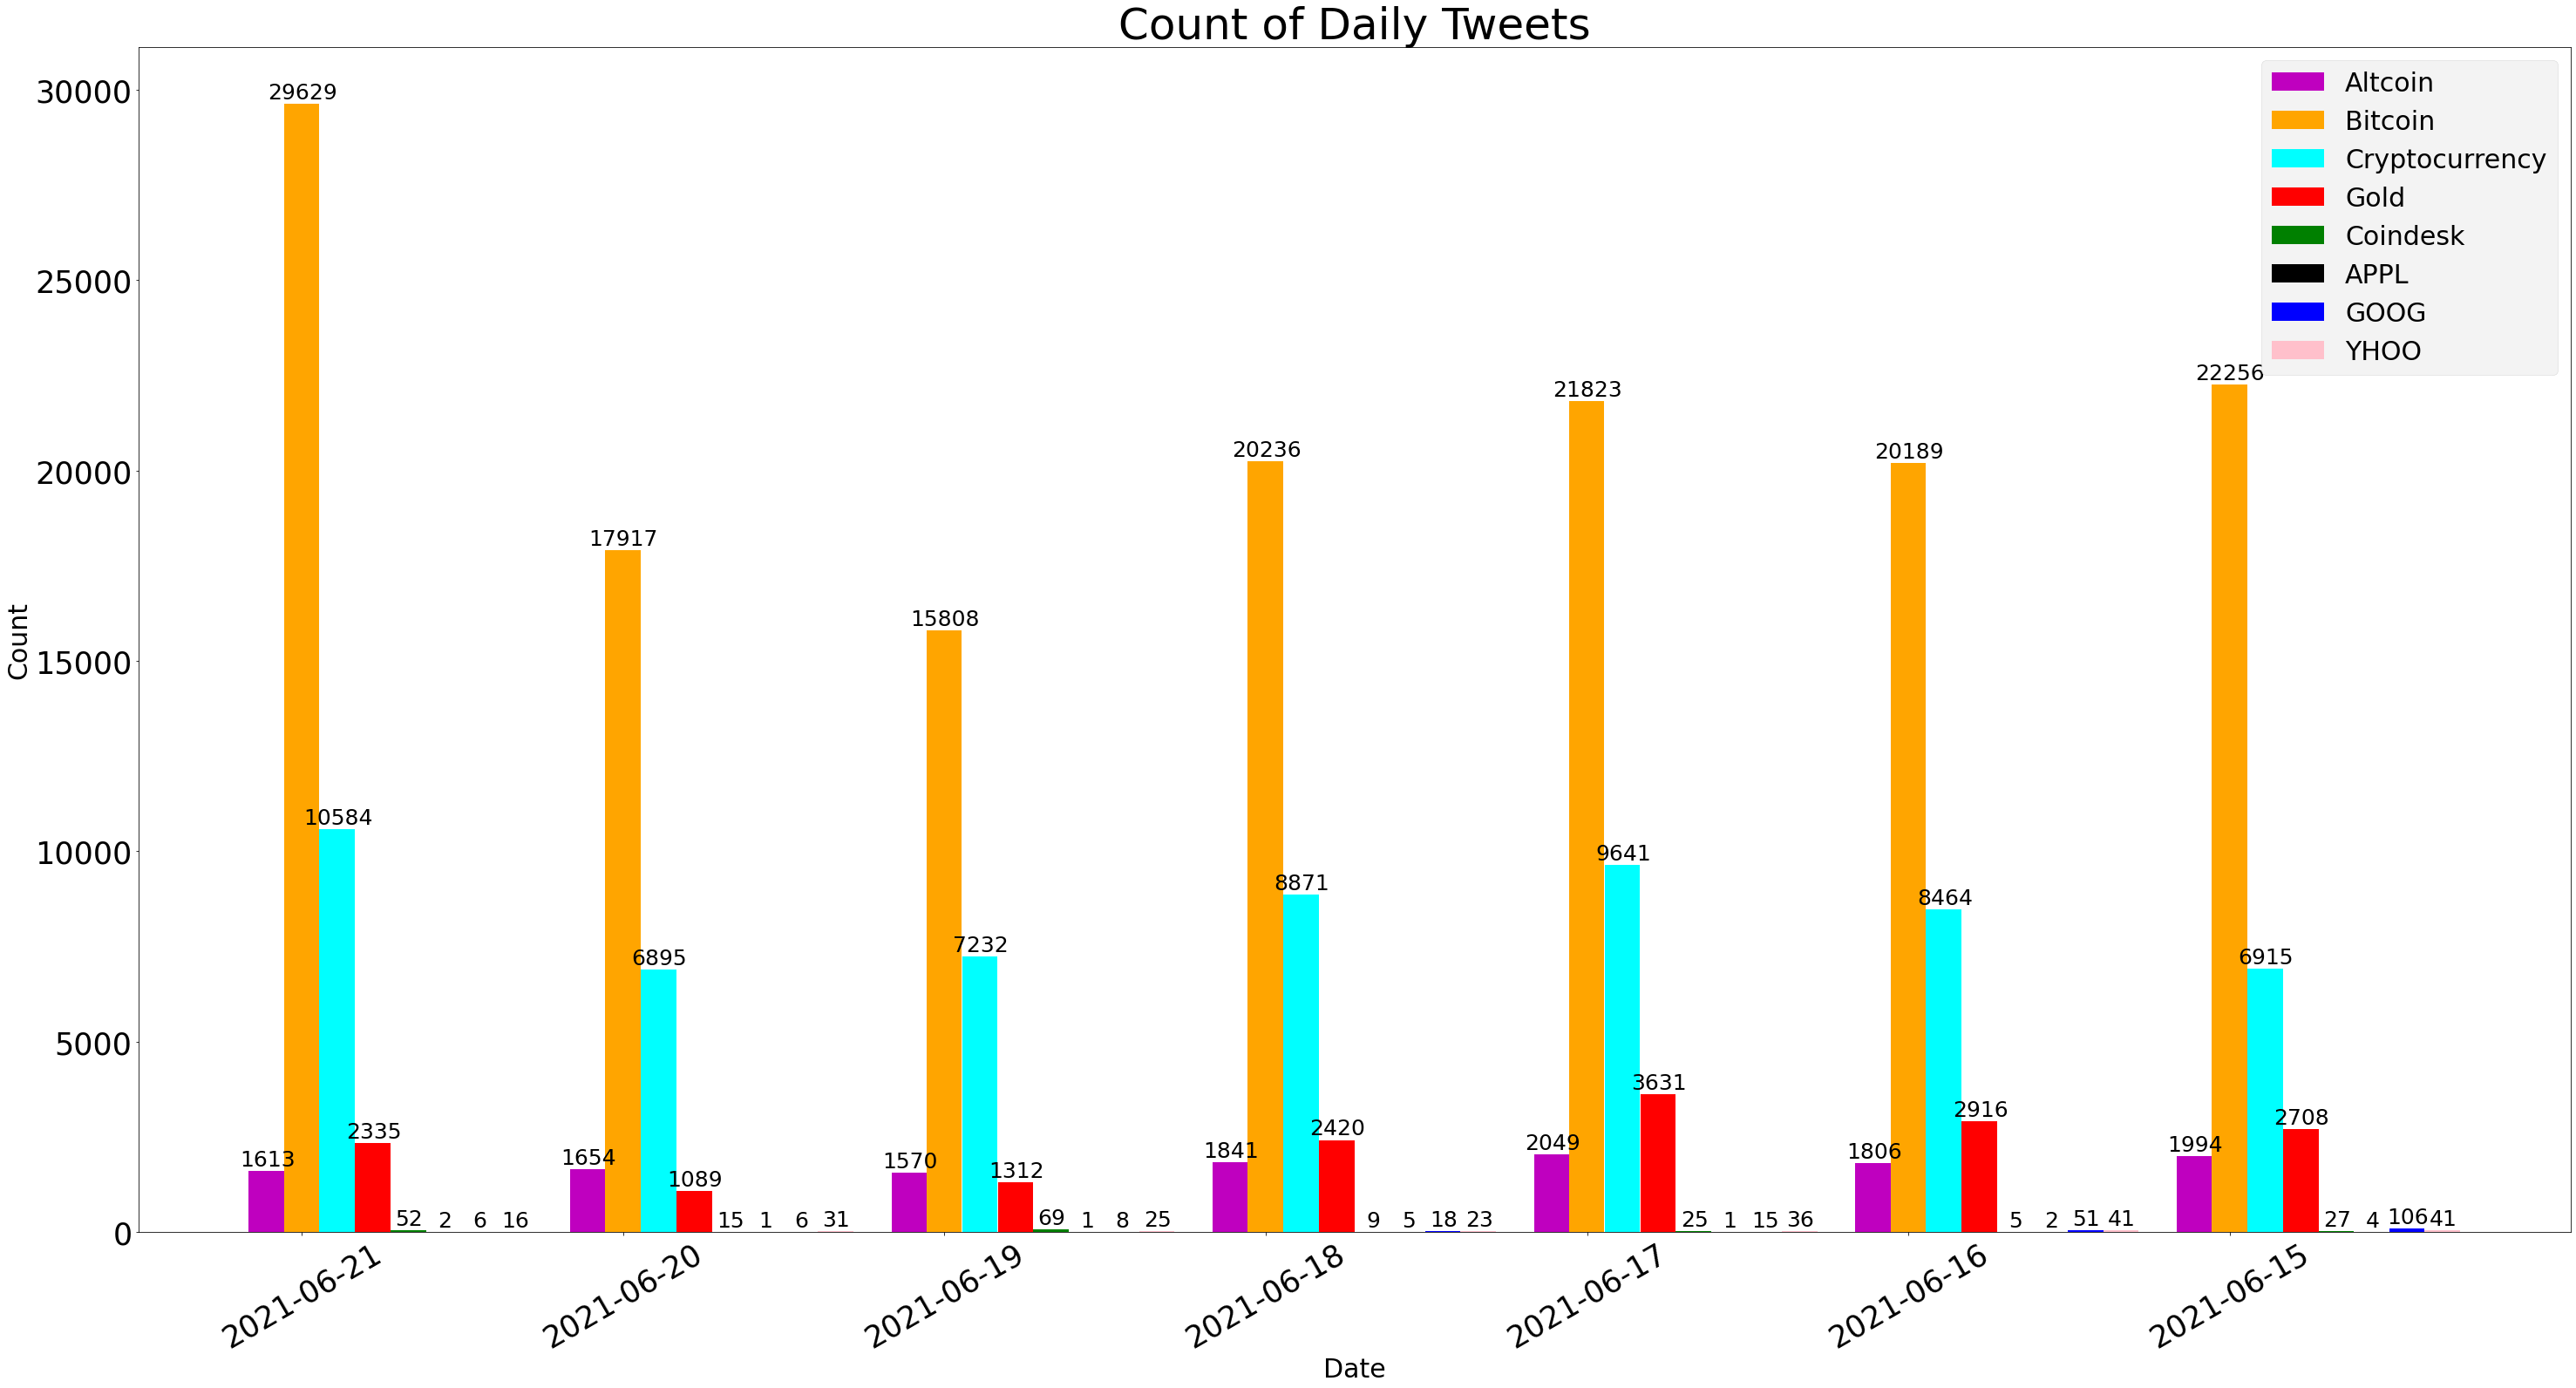

In [16]:
import matplotlib.pyplot as plt

subjects=['2021-06-21','2021-06-20','2021-06-19','2021-06-18','2021-06-17','2021-06-16','2021-06-15']


indx = np.arange(len(subjects))
y=np.arange(0,35000,5000)

altcoin = list(tweet_count_df['Altcoin'])
bitcoin = list(tweet_count_df['Bitcoin'])
coindesk=list(tweet_count_df['Coindesk'])
cryptocurrency = list(tweet_count_df['Cryptocurrency'])
gold = list(tweet_count_df['Gold'])
appl = list(tweet_count_df['APPL'])
goog = list(tweet_count_df['GOOG'])
yhoo = list(tweet_count_df['YHOO'])

bar_width=0.11
plt.rcParams["figure.figsize"] = (50,25)
fig,ax = plt.subplots()
plt.style.use('fivethirtyeight')
plt.title("Count of Daily Tweets",fontsize=50)
plt.ylabel("Count",fontsize=30)
plt.xlabel("Date",fontsize=30)

baraltcoin = ax.bar(indx - bar_width, altcoin,bar_width, label = 'Altcoin',color = 'm')
barbitcoin = ax.bar(indx - bar_width* 0.01, bitcoin, bar_width, label = 'Bitcoin',color='orange')
barcryptocurrency = ax.bar(indx + bar_width, cryptocurrency, bar_width, label = 'Cryptocurrency',color ='cyan')
bargold = ax.bar(indx + bar_width*2.01, gold, bar_width, label = 'Gold',color = 'red')
barcoindesk = ax.bar(indx + bar_width*3.01, coindesk, bar_width, label = 'Coindesk',color='g')
barappl = ax.bar(indx + bar_width*4.01, appl, bar_width, label = 'APPL',color = 'black')
bargoog = ax.bar(indx + bar_width*5.01, goog, bar_width, label = 'GOOG',color = 'blue')
baryhoo = ax.bar(indx + bar_width*6.01, yhoo, bar_width, label = 'YHOO',color = 'pink')

ax.set_xticks(indx)
ax.set_xticklabels(subjects,fontsize=35,rotation=30,ha='center')

ax.legend(fontsize=30,loc='upper right')
ax.set_yticklabels(y,fontsize=35)

def insert_data(bars):
    
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate(bar_height, 
                   xy=(bar.get_x() + bar.get_width()/2, bar_height),
                   xytext=(1,1),
                   textcoords='offset points',
                   ha='center',
                   va='bottom',size=25)
                            
insert_data(baraltcoin)
insert_data(barbitcoin)
insert_data(barcryptocurrency)
insert_data(bargold)
insert_data(barcoindesk)
insert_data(barappl)
insert_data(bargoog)
insert_data(baryhoo)
               

plt.show()

### Daily User Count

In [17]:
altcoin_user_df = cleaned_altcoin_df[['createdtime','username']]
bitcoin_user_df = cleaned_bitcoin_df[['createdtime','username']]
coindesk_user_df = cleaned_coindesk_df[['createdtime','username']]
cryptocurrency_user_df = cleaned_cryptocurrency_df[['createdtime','username']]
gold_user_df = cleaned_gold_df[['createdtime','username']]
appl_user_df = cleaned_appl_df[['createdtime','username']]
goog_user_df = cleaned_goog_df[['createdtime','username']]
yhoo_user_df = cleaned_yhoo_df[['createdtime','username']]

In [18]:
def user_count(user_df,keyword):
    user_df_new = user_df.drop_duplicates(["createdtime", "username"])
    user_df_new=user_df_new.groupby('createdtime').size().reset_index(name=keyword)
    user_df_new = pd.DataFrame(user_df_new)
    return user_df_new

In [19]:
altcoin_user_df_new = user_count(altcoin_user_df,'Altcoin')
bitcoin_user_df_new = user_count(bitcoin_user_df,'Bitcoin')
coindesk_user_df_new = user_count(coindesk_user_df,'Coindesk')
cryptocurrency_user_df_new = user_count(cryptocurrency_user_df,'Cryptocurrency')
gold_user_df_new = user_count(gold_user_df,'Gold')
appl_user_df_new = user_count(appl_user_df,'APPL')
goog_user_df_new = user_count(goog_user_df,'GOOG')
yhoo_user_df_new = user_count(yhoo_user_df,'YHOO')

In [20]:
user_count_df=altcoin_user_df_new
user_count_df['Bitcoin'] = bitcoin_user_df_new['Bitcoin'].values
user_count_df['Coindesk'] = coindesk_user_df_new['Coindesk'].values
user_count_df['Cryptocurrency'] = cryptocurrency_user_df_new['Cryptocurrency'].values
user_count_df['Gold'] = gold_user_df_new['Gold'].values
user_count_df['APPL'] = appl_user_df_new['APPL'].values
user_count_df['GOOG'] = goog_user_df_new['GOOG'].values
user_count_df['YHOO'] = yhoo_user_df_new['YHOO'].values

In [21]:
user_count_df

,createdtime,Altcoin,Bitcoin,Coindesk,Cryptocurrency,Gold,APPL,GOOG,YHOO
0,2021-06-15,1275,12681,7,4259,1589,4,105,30
1,2021-06-16,1158,11704,5,4988,1722,2,51,32
2,2021-06-17,1284,12625,24,5919,2119,1,12,27
3,2021-06-18,1167,11980,9,5551,1556,5,18,21
4,2021-06-19,968,9664,56,4104,889,1,8,19
5,2021-06-20,1069,10547,13,4314,767,1,6,25
6,2021-06-21,1071,16724,36,7143,1425,2,6,14


In [22]:
user_count_df.to_csv("Usercount.csv")

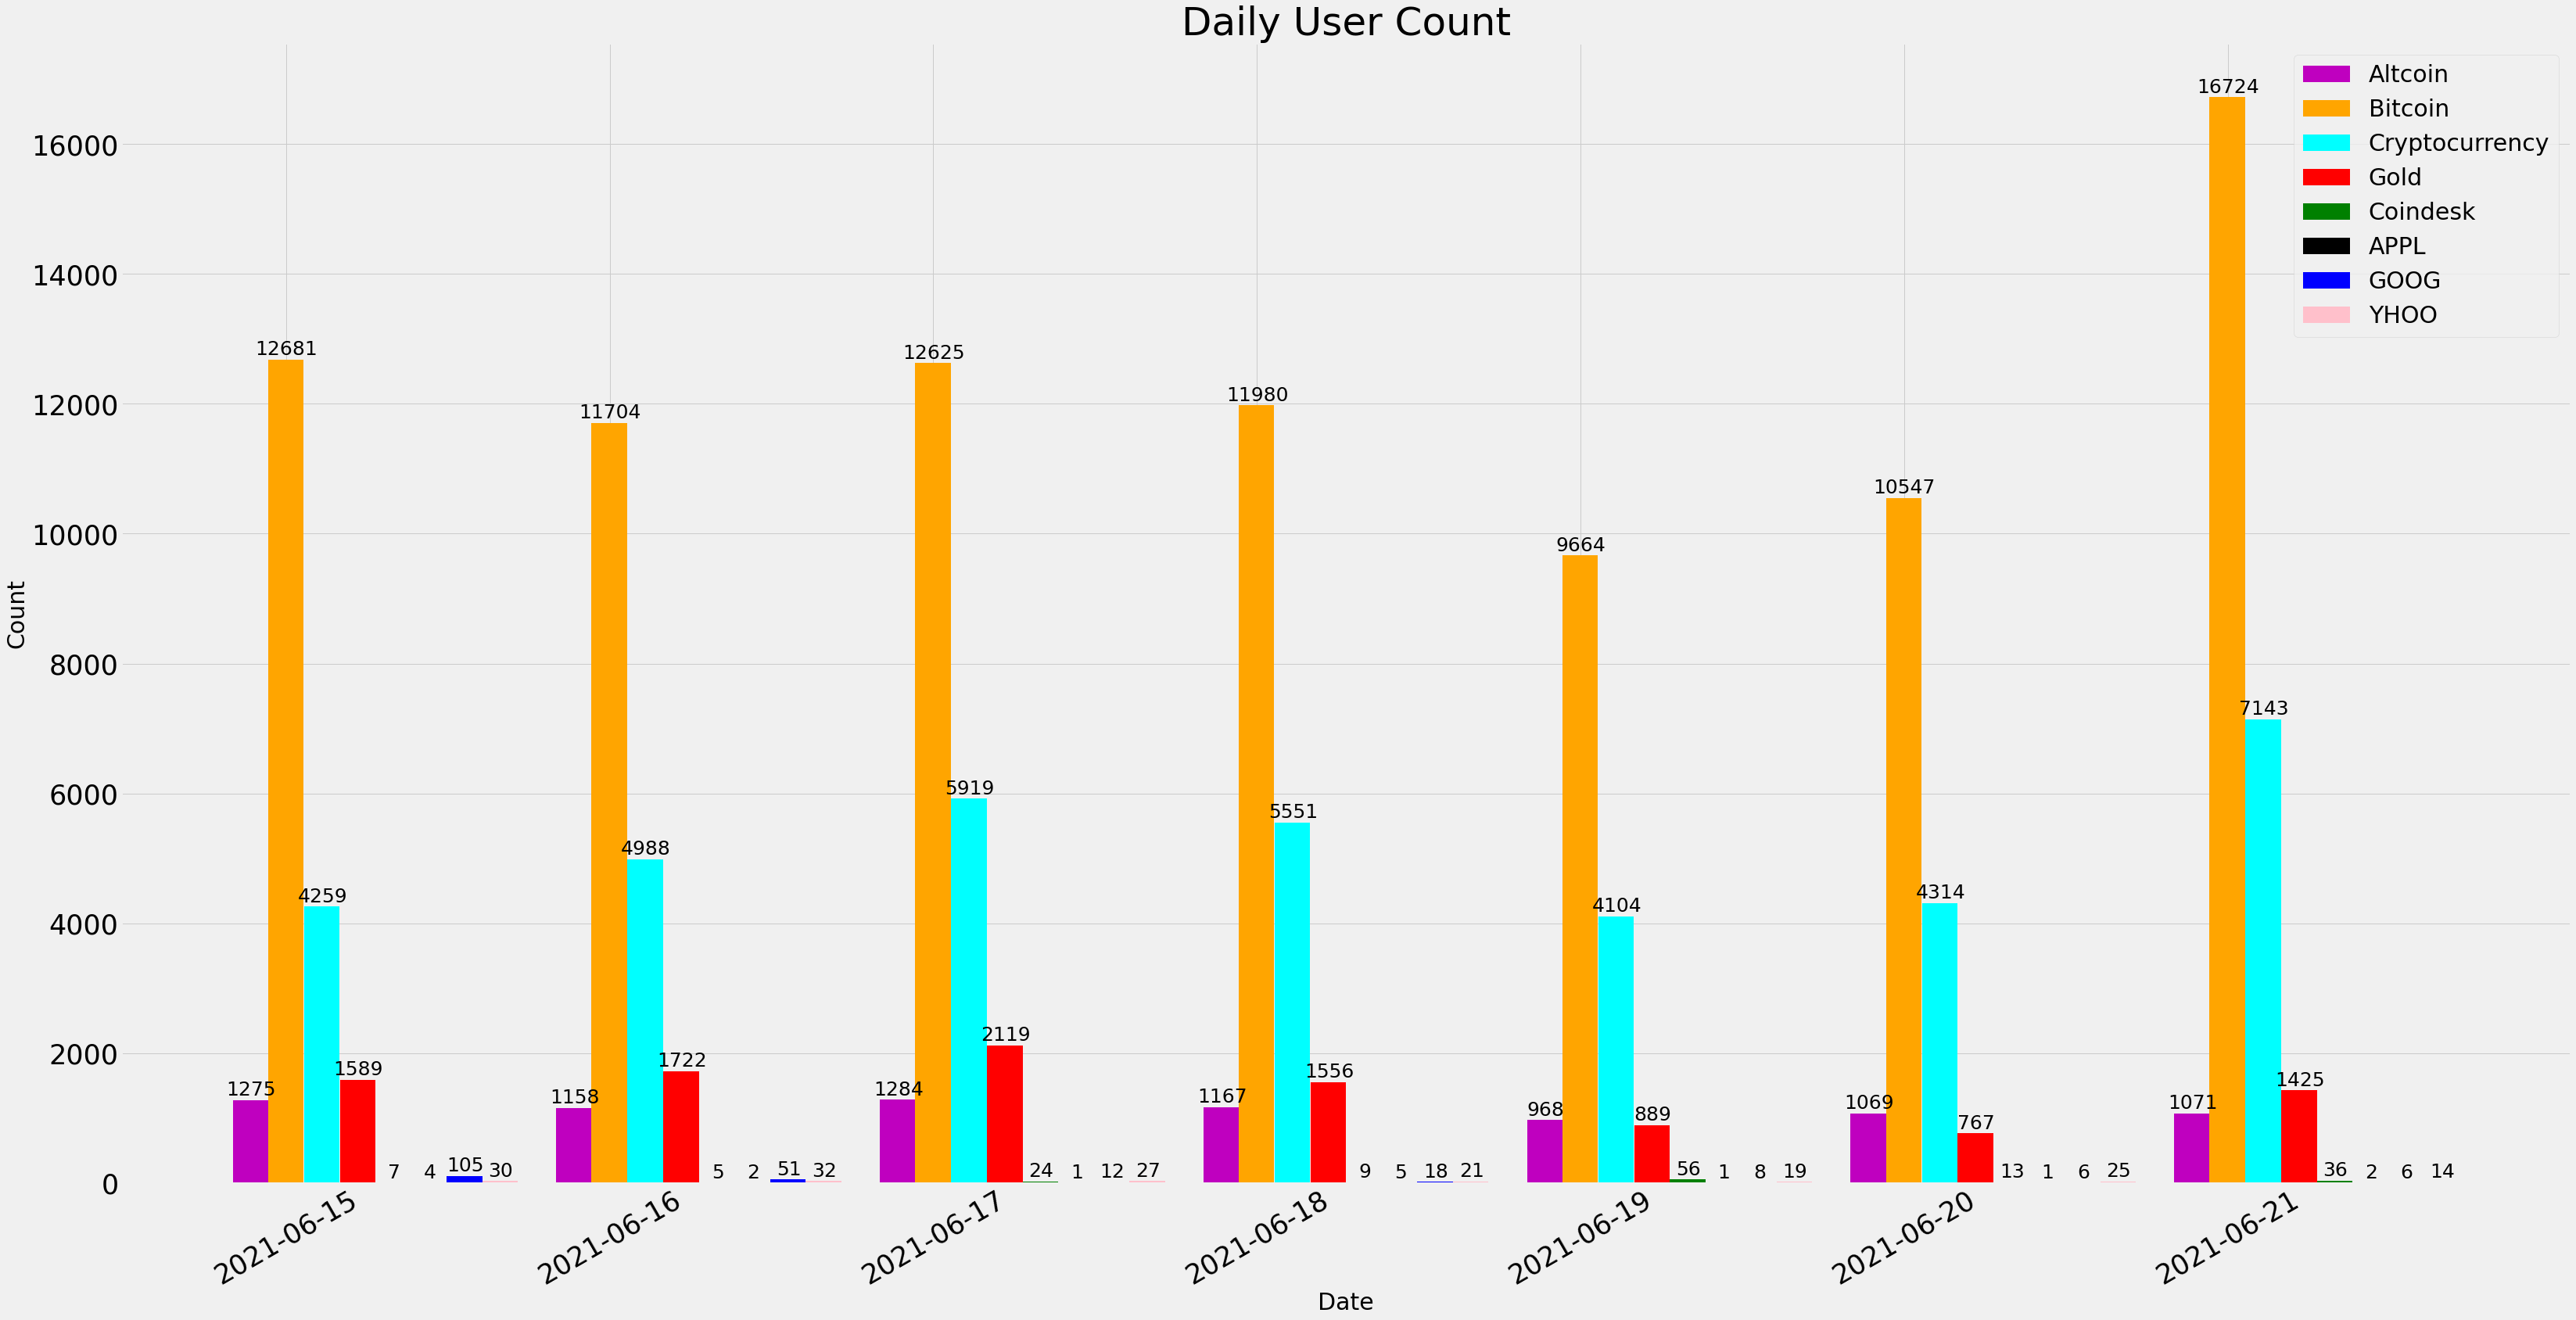

In [23]:
import matplotlib.pyplot as plt

subjects=['2021-06-15','2021-06-16','2021-06-17','2021-06-18','2021-06-19','2021-06-20','2021-06-21']

indx = np.arange(len(subjects))
y=np.arange(0,18000,2000)

altcoin = list(user_count_df['Altcoin'])
bitcoin = list(user_count_df['Bitcoin'])
coindesk=list(user_count_df['Coindesk'])
cryptocurrency = list(user_count_df['Cryptocurrency'])
gold = list(user_count_df['Gold'])
appl = list(user_count_df['APPL'])
goog = list(user_count_df['GOOG'])
yhoo = list(user_count_df['YHOO'])

bar_width=0.11
plt.rcParams["figure.figsize"] = (50,25)
fig,ax = plt.subplots()
plt.style.use('fivethirtyeight')
plt.title("Daily User Count",fontsize=50)
plt.ylabel("Count",fontsize=30)
plt.xlabel("Date",fontsize=30)

baraltcoin = ax.bar(indx - bar_width, altcoin,bar_width, label = 'Altcoin',color = 'm')
barbitcoin = ax.bar(indx - bar_width* 0.01, bitcoin, bar_width, label = 'Bitcoin',color='orange')
barcryptocurrency = ax.bar(indx + bar_width, cryptocurrency, bar_width, label = 'Cryptocurrency',color ='cyan')
bargold = ax.bar(indx + bar_width*2.01, gold, bar_width, label = 'Gold',color = 'red')
barcoindesk = ax.bar(indx + bar_width*3.01, coindesk, bar_width, label = 'Coindesk',color='g')
barappl = ax.bar(indx + bar_width*4.01, appl, bar_width, label = 'APPL',color = 'black')
bargoog = ax.bar(indx + bar_width*5.01, goog, bar_width, label = 'GOOG',color = 'blue')
baryhoo = ax.bar(indx + bar_width*6.01, yhoo, bar_width, label = 'YHOO',color = 'pink')

ax.set_xticks(indx)
ax.set_xticklabels(subjects,fontsize=35,rotation=30,ha='center')

ax.legend(fontsize=30,loc='upper right')
ax.set_yticklabels(y,fontsize=35)

def insert_data(bars):
    
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate(bar_height, 
                   xy=(bar.get_x() + bar.get_width()/2, bar_height),
                   xytext=(1,1),
                   textcoords='offset points',
                   ha='center',
                   va='bottom',size=25)
                            
insert_data(baraltcoin)
insert_data(barbitcoin)
insert_data(barcryptocurrency)
insert_data(bargold)
insert_data(barcoindesk)
insert_data(barappl)
insert_data(bargoog)
insert_data(baryhoo)              

plt.show()

## Text vectorization and Similarity

In [25]:
#Importing the libraries

import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (15,7)

In [26]:
def get_vectors(*str):
    text=[t for t in str]
    print(text)
    my_tfidf_vectorizer=TfidfVectorizer()
    my_tfidf_vectorizer.fit(text)
    
    return my_tfidf_vectorizer.transform(text).toarray()
    
def get_cosign_sim(received_vectors):
    return cosine_similarity(received_vectors)

### Altcoin


Vectors
['what are your price predictions', 'facts  at   bitcoin is still mil  up from its launch price', 'sad to see the defi king in these situations', 'people afraid of the bear party  don  be afraid  just enjoy the moment', 'the devastation has begun', 'is decentralized with and we just released our new website', 'while the rest of the market is red  trumpcoin is up    buy and hold  cryptocurrency for patriots made by patriots', 'in attempt to open dialogue he become pariah   ct is broken  interesting video from  hbar', 'crypto news  price can hit   in     is  worst case scenario', 'crypto news  you can make money playing in virtual worlds  gabby dizon']

Texts
Text 1: what are your price predictions
Text 2: facts  at   bitcoin is still mil  up from its launch price
Text 3: sad to see the defi king in these situations
Text 4: people afraid of the bear party  don  be afraid  just enjoy the moment
Text 5: the devastation has begun
Text 6: is decentralized with and we just released o

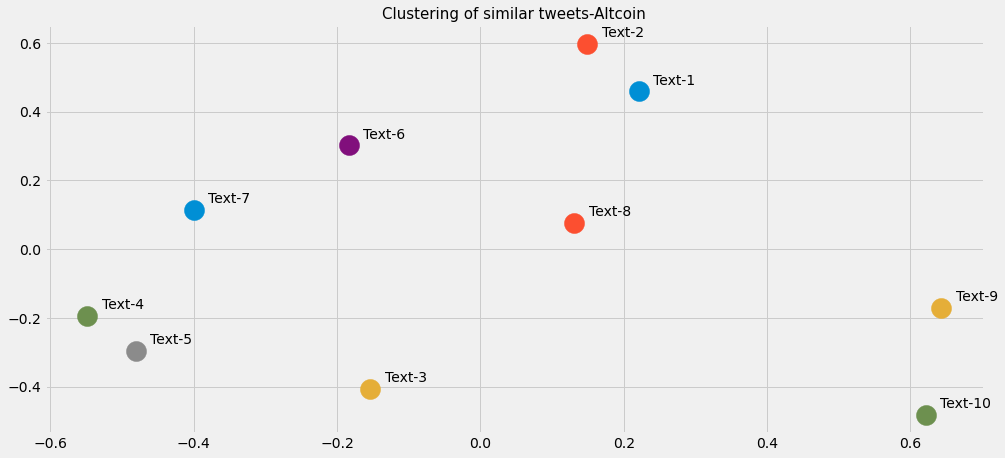

In [27]:
df_altcoin = cleaned_altcoin_df['tweets']
df_altcoin = df_altcoin.head(10)
df_altcoin = pd.DataFrame(df_altcoin,columns=['tweets'])

for text in df_altcoin:
    text = df_altcoin['tweets']

#saving the tweets as text
myText_1 = text[0]
myText_2 = text[1]
myText_3 = text[2]
myText_4 = text[3]
myText_5 = text[4]
myText_6 = text[5]
myText_7 = text[6]
myText_8 = text[7]
myText_9 = text[8]
myText_10 = text[9] 

print("\nVectors")
vectors=get_vectors(myText_1,myText_2,myText_3,myText_4,myText_5,myText_6,myText_7,myText_8,myText_9,myText_10)

print("\nTexts")
print("Text 1:",myText_1)
print("Text 2:",myText_2)
print("Text 3:",myText_3)
print("Text 4:",myText_4)
print("Text 5:",myText_5)
print("Text 6:",myText_6)
print("Text 7:",myText_7)
print("Text 8:",myText_8)
print("Text 9:",myText_9)
print("Text 10:",myText_10)

print("\nSimilarity")
similarity=get_cosign_sim(vectors)
print(similarity)

print("\nPrinciple Component Analysis")
pca=PCA(n_components=2)
cos_sim_pca=pca.fit_transform(similarity)
print(cos_sim_pca)

print("\nRetained Variation")
retained_variation=pca.explained_variance_ratio_
print(retained_variation)

#plotting the text similarity
n=cos_sim_pca.shape[0]
fig,ax=plt.subplots()
labels=["" for i in range(n)]
plt.title("Clustering of similar tweets-Altcoin",fontsize=15)

for i in range(n):
    label="Text-"+str(i+1)
    labels[i]=label
    x=cos_sim_pca[i][0]
    y=cos_sim_pca[i][1]
    ax.scatter(x,y,s=400)
    ax.text(x+.02,y+.02,label)
    
plt.show()

### Bitcoin


Vectors
['pollutes the planet     us army  hold my beer', 'am hodling  yes here  why did put in more fiat than need right now  no did its fundamentals change  no did the fed fix its balance sheet  no will care about today  price action in   years  no', 'can continue to dip   ll continue to buy said fucking dip', 'is the coin with the best risk adjusted returns of the past hours', 'in this optimal portfolio and     in the past hours would have given you     return rather than        for the same level of', 'best risk adjusted returns in the past hours    btc   sol   eth', 'pro tip  stop worrying about the price of and instead worry about how much you have stacked    remember traders often get wrecked', 'learn newbies', 'what are your price predictions', 'is hope  hope never dies']

Texts
Text 1: pollutes the planet     us army  hold my beer
Text 2: am hodling  yes here  why did put in more fiat than need right now  no did its fundamentals change  no did the fed fix its balance sheet  n

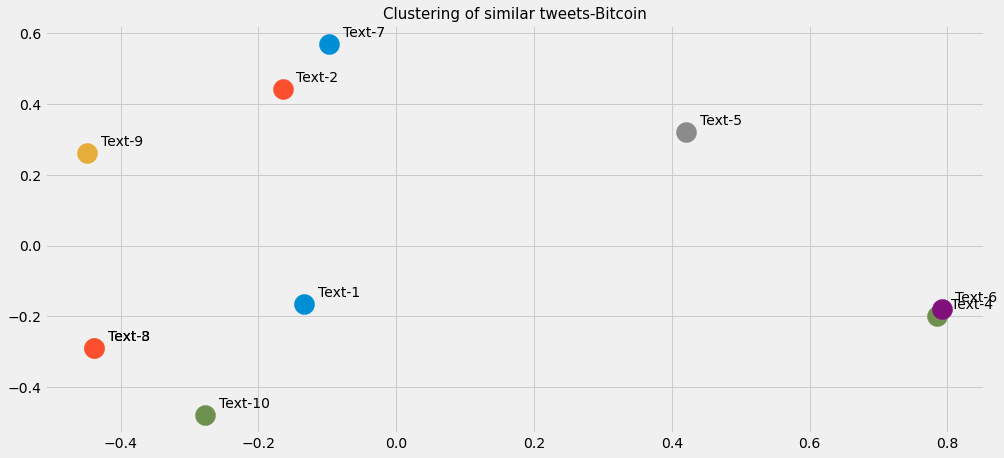

In [ ]:
df_bitcoin = cleaned_bitcoin_df['tweets']
df_bitcoin = df_bitcoin.head(10)
df_bitcoin = pd.DataFrame(df_bitcoin,columns=['tweets'])

for text in df_bitcoin:
    text = df_bitcoin['tweets']

#saving the tweets as text
myText_1 = text[0]
myText_2 = text[1]
myText_3 = text[2]
myText_4 = text[3]
myText_5 = text[4]
myText_6 = text[5]
myText_7 = text[6]
myText_8 = text[7]
myText_9 = text[8]
myText_10 = text[9] 

print("\nVectors")
vectors=get_vectors(myText_1,myText_2,myText_3,myText_4,myText_5,myText_6,myText_7,myText_8,myText_9,myText_10)

print("\nTexts")
print("Text 1:",myText_1)
print("Text 2:",myText_2)
print("Text 3:",myText_3)
print("Text 4:",myText_4)
print("Text 5:",myText_5)
print("Text 6:",myText_6)
print("Text 7:",myText_7)
print("Text 8:",myText_8)
print("Text 9:",myText_9)
print("Text 10:",myText_10)

print("\nSimilarity")
similarity=get_cosign_sim(vectors)
print(similarity)

print("\nPrinciple Component Analysis")
pca=PCA(n_components=2)
cos_sim_pca=pca.fit_transform(similarity)
print(cos_sim_pca)

print("\nRetained Variation")
retained_variation=pca.explained_variance_ratio_
print(retained_variation)

#plotting the text similarity
n=cos_sim_pca.shape[0]
fig,ax=plt.subplots()
labels=["" for i in range(n)]
plt.title("Clustering of similar tweets-Bitcoin",fontsize=15)

for i in range(n):
    label="Text-"+str(i+1)
    labels[i]=label
    x=cos_sim_pca[i][0]
    y=cos_sim_pca[i][1]
    ax.scatter(x,y,s=400)
    ax.text(x+.02,y+.02,label)
    
plt.show()

### Coindesk


Vectors
['cyio interview today with and discussing and', 'well we should be going to pluto now  not just the moon', 'those dips are what usually gets us to ath  only few understand', 'nearly there now ers  next stop is at', 'let  make fastest crypto nation with', 'we will do that am abdul rehman how do an international crypto media is ignoring thi', 'mera yeh issue raha hain is leay may sub ko follow back kar pa rahi dory bhht hoty hain phir dismiss jata hain sorry is', 'mera yeh issue raha hain is leay may sub ko follow back kar pa rahi dory bhht hoty hain phir dismiss jata hain sorry is leay', 'akhter fastest blower in the world', 'let  follow each others']

Texts
Text 1: cyio interview today with and discussing and
Text 2: well we should be going to pluto now  not just the moon
Text 3: those dips are what usually gets us to ath  only few understand
Text 4: nearly there now ers  next stop is at
Text 5: let  make fastest crypto nation with
Text 6: we will do that am abdul rehman how 

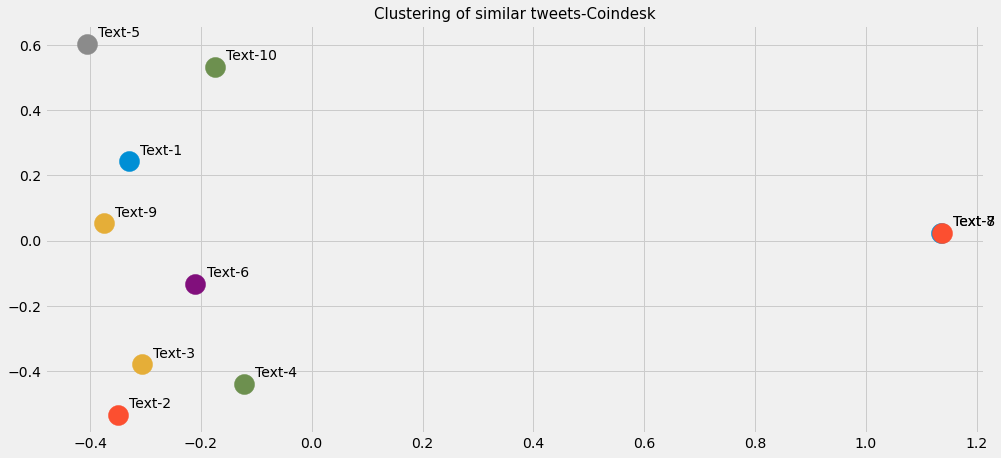

In [ ]:
df_coindesk = cleaned_coindesk_df['tweets']
df_coindesk = df_coindesk.head(10)
df_coindesk = pd.DataFrame(df_coindesk,columns=['tweets'])

for text in df_coindesk:
    text = df_coindesk['tweets']

#saving the tweets as text
myText_1 = text[0]
myText_2 = text[1]
myText_3 = text[2]
myText_4 = text[3]
myText_5 = text[4]
myText_6 = text[5]
myText_7 = text[6]
myText_8 = text[7]
myText_9 = text[8]
myText_10 = text[9] 

print("\nVectors")
vectors=get_vectors(myText_1,myText_2,myText_3,myText_4,myText_5,myText_6,myText_7,myText_8,myText_9,myText_10)

print("\nTexts")
print("Text 1:",myText_1)
print("Text 2:",myText_2)
print("Text 3:",myText_3)
print("Text 4:",myText_4)
print("Text 5:",myText_5)
print("Text 6:",myText_6)
print("Text 7:",myText_7)
print("Text 8:",myText_8)
print("Text 9:",myText_9)
print("Text 10:",myText_10)

print("\nSimilarity")
similarity=get_cosign_sim(vectors)
print(similarity)

print("\nPrinciple Component Analysis")
pca=PCA(n_components=2)
cos_sim_pca=pca.fit_transform(similarity)
print(cos_sim_pca)

print("\nRetained Variation")
retained_variation=pca.explained_variance_ratio_
print(retained_variation)

#plotting the text similarity
n=cos_sim_pca.shape[0]
fig,ax=plt.subplots()
labels=["" for i in range(n)]
plt.title("Clustering of similar tweets-Coindesk",fontsize=15)

for i in range(n):
    label="Text-"+str(i+1)
    labels[i]=label
    x=cos_sim_pca[i][0]
    y=cos_sim_pca[i][1]
    ax.scatter(x,y,s=400)
    ax.text(x+.02,y+.02,label)
    
plt.show()

### Cryptocurrency


Vectors
['best risk adjusted returns in the past hours    btc   sol   eth', 'what about this speculation       official', 'what are your price predictions', 'absolutely throwing up right now', 'elon musk laughs at shiba inu  shib  community as they claim nobody will use doge  btc  xrp  eth', 'new innovation project  circle coin  and our products via', 'left  the of is coming', 'buying yes   mostly  ngm of  money before they announce rebranding  integration and new exchange listing  great choice for massive gains    provides payment solution using technology with its different eu', 'read carefully  is easy to predict and it  trending now  be nice  get rich fast and short', 'omg    do keep buying the dip    keep buying more and more and it keeps going down  hard to resist buying everything at these prices  even bought']

Texts
Text 1: best risk adjusted returns in the past hours    btc   sol   eth
Text 2: what about this speculation       official
Text 3: what are your price predictions

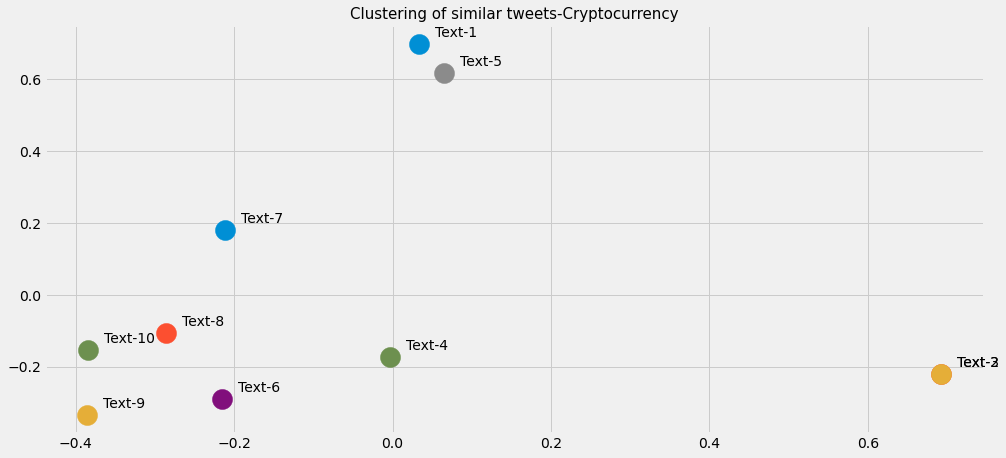

In [29]:
df_cryptocurrency = cleaned_cryptocurrency_df['tweets']
df_cryptocurrency = df_cryptocurrency.head(10)
df_cryptocurrency = pd.DataFrame(df_cryptocurrency,columns=['tweets'])

for text in df_cryptocurrency:
    text = df_cryptocurrency['tweets']

#saving the tweets as text
myText_1 = text[0]
myText_2 = text[1]
myText_3 = text[2]
myText_4 = text[3]
myText_5 = text[4]
myText_6 = text[5]
myText_7 = text[6]
myText_8 = text[7]
myText_9 = text[8]
myText_10 = text[9] 

print("\nVectors")
vectors=get_vectors(myText_1,myText_2,myText_3,myText_4,myText_5,myText_6,myText_7,myText_8,myText_9,myText_10)

print("\nTexts")
print("Text 1:",myText_1)
print("Text 2:",myText_2)
print("Text 3:",myText_3)
print("Text 4:",myText_4)
print("Text 5:",myText_5)
print("Text 6:",myText_6)
print("Text 7:",myText_7)
print("Text 8:",myText_8)
print("Text 9:",myText_9)
print("Text 10:",myText_10)

print("\nSimilarity")
similarity=get_cosign_sim(vectors)
print(similarity)

print("\nPrinciple Component Analysis")
pca=PCA(n_components=2)
cos_sim_pca=pca.fit_transform(similarity)
print(cos_sim_pca)

print("\nRetained Variation")
retained_variation=pca.explained_variance_ratio_
print(retained_variation)

#plotting the text similarity
n=cos_sim_pca.shape[0]
fig,ax=plt.subplots()
labels=["" for i in range(n)]
plt.title("Clustering of similar tweets-Cryptocurrency",fontsize=15)

for i in range(n):
    label="Text-"+str(i+1)
    labels[i]=label
    x=cos_sim_pca[i][0]
    y=cos_sim_pca[i][1]
    ax.scatter(x,y,s=400)
    ax.text(x+.02,y+.02,label)
    
plt.show()

### Gold


Vectors
['finishing pad construction for hole at nayumbi in southern condor   lr   lumif', 'maloney don  know if it will ever happen   but could see the day when can buy an average single house would be interesting to see how that also relates to ounces to house and ounces to house', 'would even go step further and say that if the us government taxed corporates properly    they wouldn  have the capital to buyback as much as they do so its not or  aapl or     its all things are in an economic science experiment that probably wont end well', 'rebounds as    yields slip and rally stalls  the reversal in some of the strong ga', 'tin nice mineralisation intersected  reids ridgesm      gold from  to   possible new discovery in the making', 'gld has purpose in use  yet it  unproductive investment  it requires storage fees  is unproductive  useless asset  which has high trading fees ada has usefulness     contracts etc  in comparison to  btccash is king  no matter inflation', 'with the except

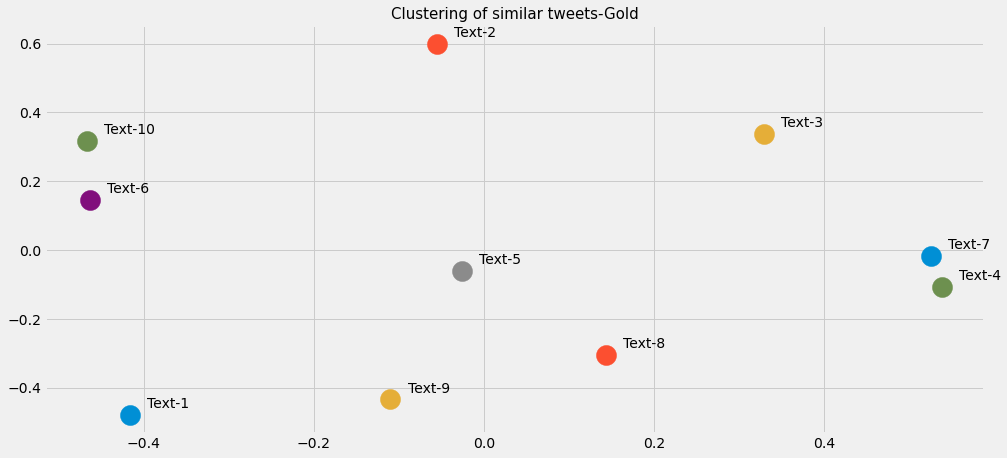

In [ ]:
df_gold = cleaned_gold_df['tweets']
df_gold = df_gold.head(10)
df_gold = pd.DataFrame(df_gold,columns=['tweets'])

for text in df_gold:
    text = df_gold['tweets']

#saving the tweets as text
myText_1 = text[0]
myText_2 = text[1]
myText_3 = text[2]
myText_4 = text[3]
myText_5 = text[4]
myText_6 = text[5]
myText_7 = text[6]
myText_8 = text[7]
myText_9 = text[8]
myText_10 = text[9] 

print("\nVectors")
vectors=get_vectors(myText_1,myText_2,myText_3,myText_4,myText_5,myText_6,myText_7,myText_8,myText_9,myText_10)

print("\nTexts")
print("Text 1:",myText_1)
print("Text 2:",myText_2)
print("Text 3:",myText_3)
print("Text 4:",myText_4)
print("Text 5:",myText_5)
print("Text 6:",myText_6)
print("Text 7:",myText_7)
print("Text 8:",myText_8)
print("Text 9:",myText_9)
print("Text 10:",myText_10)

print("\nSimilarity")
similarity=get_cosign_sim(vectors)
print(similarity)

print("\nPrinciple Component Analysis")
pca=PCA(n_components=2)
cos_sim_pca=pca.fit_transform(similarity)
print(cos_sim_pca)

print("\nRetained Variation")
retained_variation=pca.explained_variance_ratio_
print(retained_variation)

#plotting the text similarity
n=cos_sim_pca.shape[0]
fig,ax=plt.subplots()
labels=["" for i in range(n)]
plt.title("Clustering of similar tweets-Gold",fontsize=15)

for i in range(n):
    label="Text-"+str(i+1)
    labels[i]=label
    x=cos_sim_pca[i][0]
    y=cos_sim_pca[i][1]
    ax.scatter(x,y,s=400)
    ax.text(x+.02,y+.02,label)
    
plt.show()

### APPL


Vectors
['now sold at  mint millionsabove level see what happens to apple   up in day      why     cook to', 'now sold at  mint millionsabove level see what happens to apple   up in day      why     cook told us big secret', 'iphone xsmax giguk used with chargercomes with case and protectorvery neat  no issuesbattery health  percentpri', 'iphone xsmax giguk used with chargercomes with case and protectorvery neat  no issuesbattery health  percentprice  ghc  promo unlockedcall or whatsapp location  abossey okai zongo junction bus stop or search igoodsgh on google map', 'elliott wave analysis  charts are released earlier in our discord group please like and share if you appreciate this analysis', 'madhav reveals its plans  amp  arrival of upcoming products including realme gt  in india', 'fast forward to   secs and watch explaining on camera how to manipulate   spread lies as to how verizon and att do not want apple phone  and more   and this guy in on giving financial advise', 'btc  eth

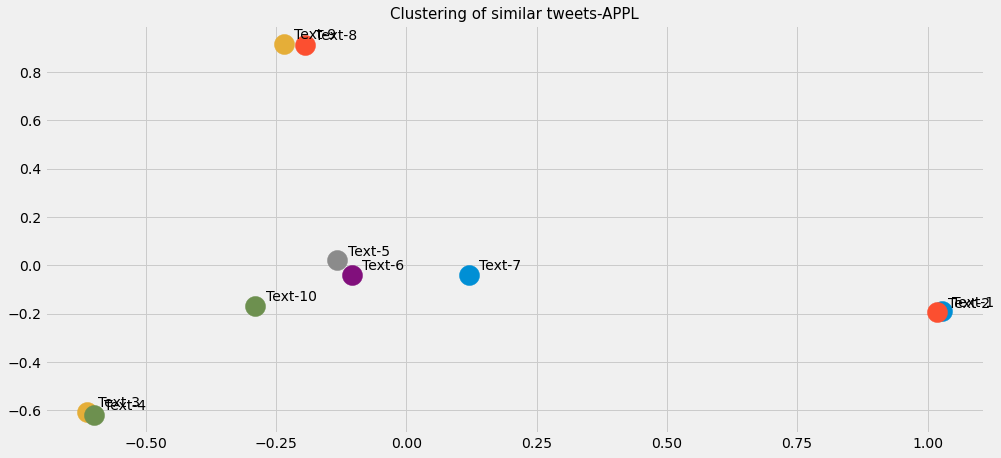

In [ ]:
df_appl = cleaned_appl_df['tweets']
df_appl = df_appl.head(10)
df_appl = pd.DataFrame(df_appl,columns=['tweets'])

for text in df_appl:
    text = df_appl['tweets']

#saving the tweets as text
myText_1 = text[0]
myText_2 = text[1]
myText_3 = text[2]
myText_4 = text[3]
myText_5 = text[4]
myText_6 = text[5]
myText_7 = text[6]
myText_8 = text[7]
myText_9 = text[8]
myText_10 = text[9] 

print("\nVectors")
vectors=get_vectors(myText_1,myText_2,myText_3,myText_4,myText_5,myText_6,myText_7,myText_8,myText_9,myText_10)

print("\nTexts")
print("Text 1:",myText_1)
print("Text 2:",myText_2)
print("Text 3:",myText_3)
print("Text 4:",myText_4)
print("Text 5:",myText_5)
print("Text 6:",myText_6)
print("Text 7:",myText_7)
print("Text 8:",myText_8)
print("Text 9:",myText_9)
print("Text 10:",myText_10)

print("\nSimilarity")
similarity=get_cosign_sim(vectors)
print(similarity)

print("\nPrinciple Component Analysis")
pca=PCA(n_components=2)
cos_sim_pca=pca.fit_transform(similarity)
print(cos_sim_pca)

print("\nRetained Variation")
retained_variation=pca.explained_variance_ratio_
print(retained_variation)

#plotting the text similarity
n=cos_sim_pca.shape[0]
fig,ax=plt.subplots()
labels=["" for i in range(n)]
plt.title("Clustering of similar tweets-APPL",fontsize=15)

for i in range(n):
    label="Text-"+str(i+1)
    labels[i]=label
    x=cos_sim_pca[i][0]
    y=cos_sim_pca[i][1]
    ax.scatter(x,y,s=400)
    ax.text(x+.02,y+.02,label)
    
plt.show()

### GOOG


Vectors
['thank you for making this opportunity  hopefully this project will be successful  lady  fish air  to neet  goog', 'good luck  togheter to the moon crypto', 'good job    goog', 'curiosity ink media  cepia collaborate to transform cats vs  pickles into an original series', 'faang parted ways  apple netflix has fallen behind apple and netflix are doing badly not only underperformed the market  but their earnings so far this year are also negative  falling    and     respectively', 'google  short it    tradingview', 'go to moon  goog  paly  goog', 'watch investing performance stock indexes  sectors and faang etf investi    via      dji  dia  ym', 'ir  goog', 'good    mrbee  goog']

Texts
Text 1: thank you for making this opportunity  hopefully this project will be successful  lady  fish air  to neet  goog
Text 2: good luck  togheter to the moon crypto
Text 3: good job    goog
Text 4: curiosity ink media  cepia collaborate to transform cats vs  pickles into an original series
Tex

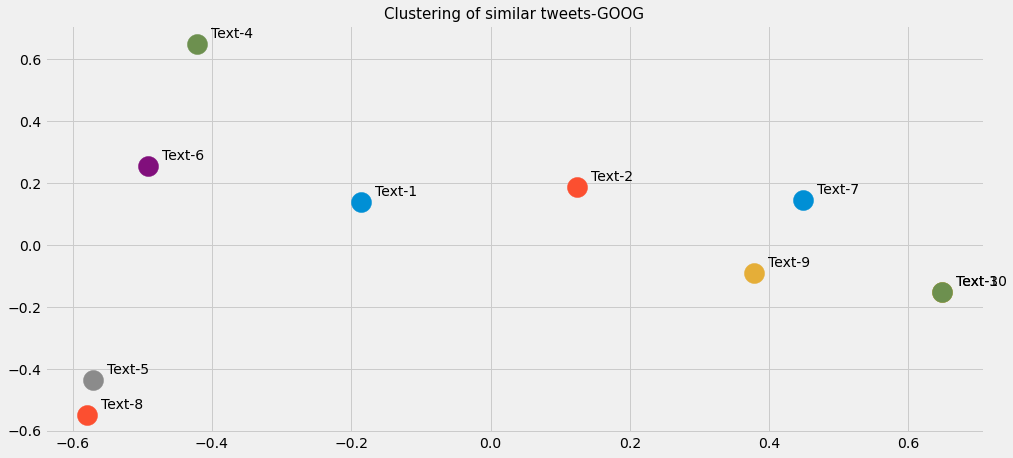

In [ ]:
df_goog = cleaned_goog_df['tweets']
df_goog = df_goog.head(10)
df_goog = pd.DataFrame(df_goog,columns=['tweets'])

for text in df_goog:
    text = df_goog['tweets']

#saving the tweets as text
myText_1 = text[0]
myText_2 = text[1]
myText_3 = text[2]
myText_4 = text[3]
myText_5 = text[4]
myText_6 = text[5]
myText_7 = text[6]
myText_8 = text[7]
myText_9 = text[8]
myText_10 = text[9] 

print("\nVectors")
vectors=get_vectors(myText_1,myText_2,myText_3,myText_4,myText_5,myText_6,myText_7,myText_8,myText_9,myText_10)

print("\nTexts")
print("Text 1:",myText_1)
print("Text 2:",myText_2)
print("Text 3:",myText_3)
print("Text 4:",myText_4)
print("Text 5:",myText_5)
print("Text 6:",myText_6)
print("Text 7:",myText_7)
print("Text 8:",myText_8)
print("Text 9:",myText_9)
print("Text 10:",myText_10)

print("\nSimilarity")
similarity=get_cosign_sim(vectors)
print(similarity)

print("\nPrinciple Component Analysis")
pca=PCA(n_components=2)
cos_sim_pca=pca.fit_transform(similarity)
print(cos_sim_pca)

print("\nRetained Variation")
retained_variation=pca.explained_variance_ratio_
print(retained_variation)

#plotting the text similarity
n=cos_sim_pca.shape[0]
fig,ax=plt.subplots()
labels=["" for i in range(n)]
plt.title("Clustering of similar tweets-GOOG",fontsize=15)

for i in range(n):
    label="Text-"+str(i+1)
    labels[i]=label
    x=cos_sim_pca[i][0]
    y=cos_sim_pca[i][1]
    ax.scatter(x,y,s=400)
    ax.text(x+.02,y+.02,label)
    
plt.show()

### YHOO


Vectors
['it  monday     start before you re ready cos you can never be too ready to start', 'little golden book eloise wilkins mother goose authentic lg book produced for chick fil', 'happy', 'greenall whitley  cap chase   yahoo', 'what is the new blockchain  read  understand and invest  mtv', 'what is the new blockchain  read  understand and invest  mtv  sushi', 'who the fuck still using mail      my username was    growing up wonder what was on my mind that time', 'the clear blue sky above is something all of us want  our wants can wait but not our needs  and thinking that way empowers you to work really hard', 'if   not reincarnated as cat for my next life  will riot  being cat is like experiencing royalty and gap year at the same time  social obligations  nah  moral obligations  nah', 'aerospace research laboratories research on analysis of variance and related topics united states air force']

Texts
Text 1: it  monday     start before you re ready cos you can never be too ready 

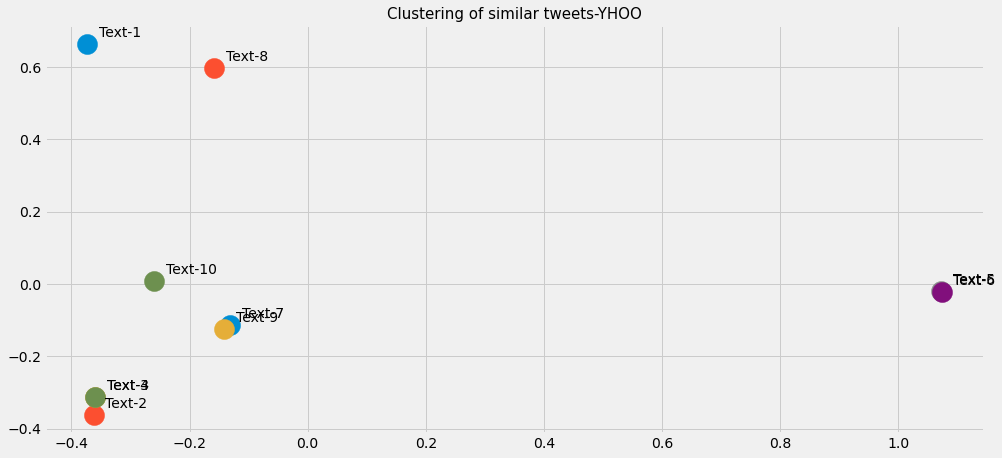

In [ ]:
df_yhoo = cleaned_yhoo_df['tweets']
df_yhoo = df_yhoo.head(10)
df_yhoo = pd.DataFrame(df_yhoo,columns=['tweets'])

for text in df_yhoo:
    text = df_yhoo['tweets']

#saving the tweets as text
myText_1 = text[0]
myText_2 = text[1]
myText_3 = text[2]
myText_4 = text[3]
myText_5 = text[4]
myText_6 = text[5]
myText_7 = text[6]
myText_8 = text[7]
myText_9 = text[8]
myText_10 = text[9] 

print("\nVectors")
vectors=get_vectors(myText_1,myText_2,myText_3,myText_4,myText_5,myText_6,myText_7,myText_8,myText_9,myText_10)

print("\nTexts")
print("Text 1:",myText_1)
print("Text 2:",myText_2)
print("Text 3:",myText_3)
print("Text 4:",myText_4)
print("Text 5:",myText_5)
print("Text 6:",myText_6)
print("Text 7:",myText_7)
print("Text 8:",myText_8)
print("Text 9:",myText_9)
print("Text 10:",myText_10)

print("\nSimilarity")
similarity=get_cosign_sim(vectors)
print(similarity)

print("\nPrinciple Component Analysis")
pca=PCA(n_components=2)
cos_sim_pca=pca.fit_transform(similarity)
print(cos_sim_pca)

print("\nRetained Variation")
retained_variation=pca.explained_variance_ratio_
print(retained_variation)

#plotting the text similarity
n=cos_sim_pca.shape[0]
fig,ax=plt.subplots()
labels=["" for i in range(n)]
plt.title("Clustering of similar tweets-YHOO",fontsize=15)

for i in range(n):
    label="Text-"+str(i+1)
    labels[i]=label
    x=cos_sim_pca[i][0]
    y=cos_sim_pca[i][1]
    ax.scatter(x,y,s=400)
    ax.text(x+.02,y+.02,label)
    
plt.show()